<a href="https://colab.research.google.com/github/ynnuSunny/Home-Cleaning-Services-Analysis/blob/main/Home_Cleaning_Services_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load the data

In [2]:

df = pd.read_csv('Home Cleaning Services.csv')

output = []  # List to store output results
output.append("Exploratory Data Analysis of Home Cleaning Services\n")
output.append("====================================\n")

## Step 3: Explore the data

In [3]:
print(df.head())  # Display the first few rows
output.append(f"First few rows:\n{df.head()}\n")

         Date         Product Region Customer_Type  Quantity   Price  \
0  2024-05-02    Weekly Clean  North   Residential        20  181.93   
1  2024-10-26  One-time Clean   East    Commercial        18  223.20   
2  2024-10-02  One-time Clean  South   Residential        16  113.81   
3  2024-09-20      Deep Clean   West    Commercial        19   88.43   
4  2024-03-11      Deep Clean  South    Commercial        13  178.88   

   Discount  Revenue  
0      0.09  3311.13  
1      0.04  3856.90  
2      0.00  1820.96  
3      0.07  1562.56  
4      0.29  1651.06  


In [ ]:
# Get basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1000 non-null   datetime64[ns]
 1   Product        1000 non-null   object        
 2   Region         1000 non-null   object        
 3   Customer_Type  1000 non-null   object        
 4   Quantity       1000 non-null   int64         
 5   Price          1000 non-null   float64       
 6   Discount       1000 non-null   float64       
 7   Revenue        1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
print(df.describe()) # Summary statistics
output.append(f"Summary Statistics:\n{df.describe()}\n")

          Quantity        Price     Discount      Revenue
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     10.674000   175.530930     0.150920  1582.044310
std       5.798219    73.522959     0.085246  1162.410198
min       1.000000    50.010000     0.000000    41.750000
25%       6.000000   110.272500     0.080000   652.437500
50%      11.000000   174.390000     0.150000  1266.290000
75%      16.000000   239.632500     0.220000  2398.450000
max      20.000000   299.900000     0.300000  5703.010000


## Step 4: Clean the data

In [ ]:
output.append("Data Cleaning Results:\n")
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
output.append(f"Missing Values:\n{missing_values}\n")

# Fill or drop missing values as necessary
df.dropna(inplace=True)

# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

Date             0
Product          0
Region           0
Customer_Type    0
Quantity         0
Price            0
Discount         0
Revenue          0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
output.append(f"Number of Duplicates Dropped: {duplicates}\n")
df.drop_duplicates(inplace=True)

## Step 5: Analyze the data

In [ ]:
# Total revenue from cleaning services
total_revenue = df['Revenue'].sum()
output.append(f'Total Revenue: ${total_revenue}\n')
print(f'Total Revenue: ${total_revenue}')

Total Revenue: $175530.93


In [5]:
# average price per Customer_Type wise
average_price_per_service = df.groupby('Customer_Type')['Price'].mean()
output.append("Average Price per Customer Type:\n")
output.append(f"{average_price_per_service}\n")
print(average_price_per_service)


Customer_Type
Commercial     179.609882
Residential    171.319329
Name: Price, dtype: float64


In [7]:
# Total services provided by region
total_services_by_region = df['Region'].value_counts()
output.append("Total Services Provided by Region:\n")
output.append(f"{total_services_by_region}\n")
print(total_services_by_region)


Region
North    264
East     256
South    248
West     232
Name: count, dtype: int64


In [ ]:
# Total revenue by region
revenue_by_region = df.groupby('Region')['Price'].sum()
output.append("Total Revenue by Region:\n")
output.append(f"{revenue_by_region}\n")
print(revenue_by_region)

Region
East     45459.58
North    46240.91
South    43318.52
West     40511.92
Name: Price, dtype: float64


## Step 6: Visualize the data

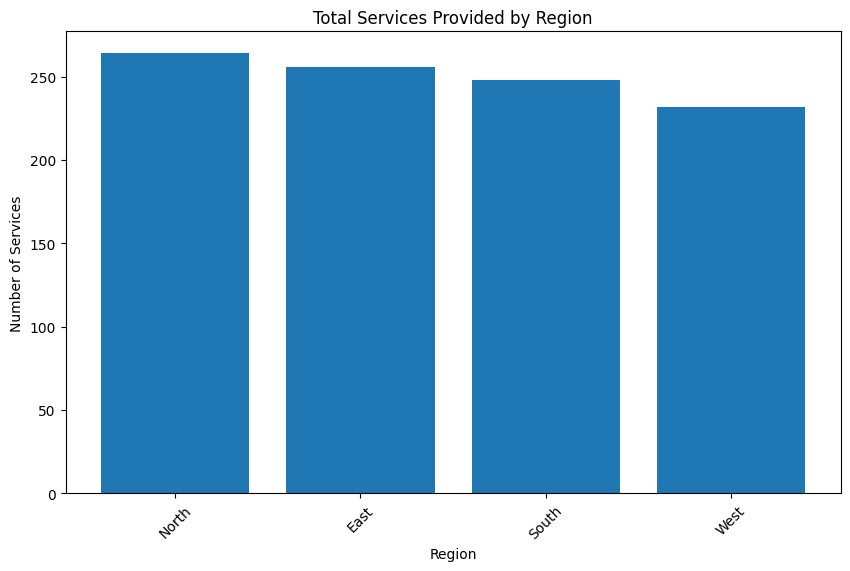

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(total_services_by_region.index, total_services_by_region.values)
plt.title('Total Services Provided by Region')
plt.xlabel('Region')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.savefig('total_services_by_region.png')  # Save the figure
plt.show()

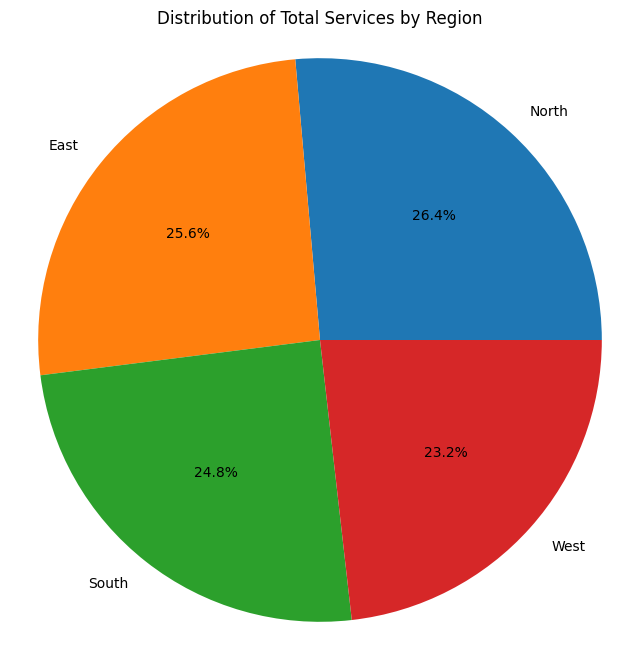

In [10]:
# Pie chart for total services by region
plt.figure(figsize=(8, 8))
plt.pie(total_services_by_region, labels=total_services_by_region.index, autopct='%1.1f%%')
plt.title('Distribution of Total Services by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.savefig('services_distribution_by_region.png')  # Save the figure
plt.show()

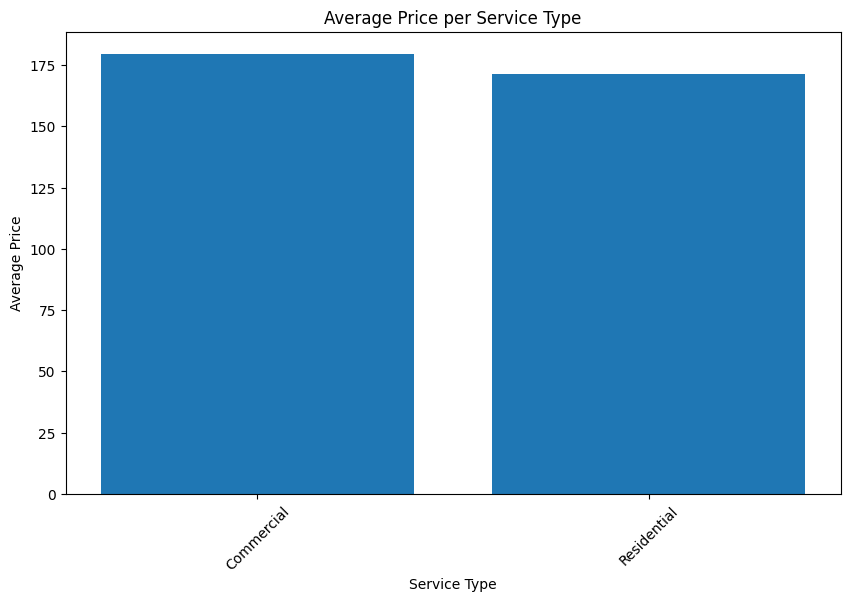

In [ ]:
# Bar plot of average price per service type
plt.figure(figsize=(10, 6))
plt.bar(average_price_per_service.index, average_price_per_service.values)
plt.title('Average Price per Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.savefig('average_price_per_service.png')  # Save the figure
plt.show()

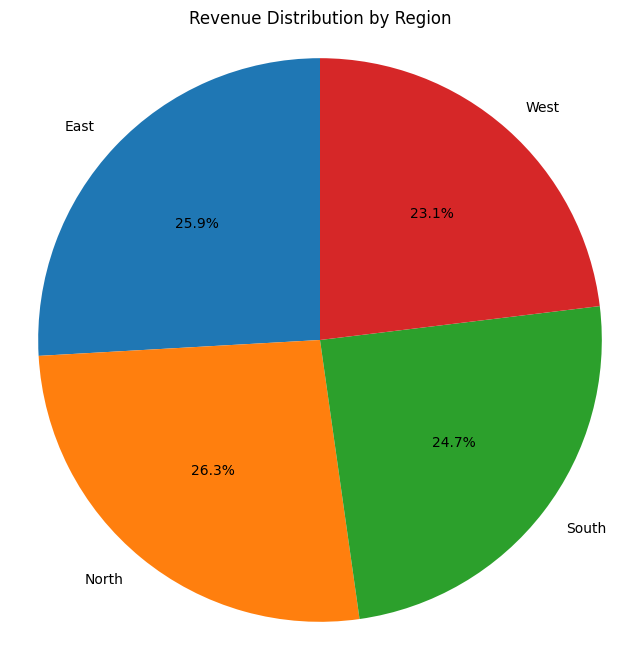

In [ ]:
# Pie chart for revenue by service type
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%')
plt.title('Revenue Distribution by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.savefig('revenue_distribution_by_region.png')  # Save the figure
plt.show()

## Save output in file

In [ ]:
# Save output to a text file
with open('analysis_output.txt', 'w') as f:
    f.writelines(output)